In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
# Importing the training set
dataset = pd.read_csv('ModuleDataset_processed.csv')
print(dataset.columns)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X.shape,y.shape

Index(['year', 'month', 'rainfall', 'Flood'], dtype='object')


array([[1943, 'Jan', 28.06],
       [1943, 'Feb', 42.956],
       [1943, 'Mar', 0.0],
       ...,
       [2016, 'Sep', 275.3],
       [2016, 'Oct', 28.8],
       [2016, 'Nov', 66.1]], dtype=object)

In [149]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,2:3], y, test_size = 0.25, random_state = 0)

In [150]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/murlikrishnan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/murlikrishnan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/murlikrishnan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [151]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/home/murlikrishnan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

/home/murlikrishnan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


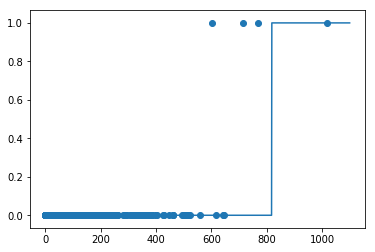

In [153]:
# Visualising the Training set results
plt.scatter(sc.inverse_transform(X_train),y_train)
plt.plot(np.arange(1100),classifier.predict(sc.transform(np.arange(1100).reshape(-1,1))))
plt.show()

/home/murlikrishnan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


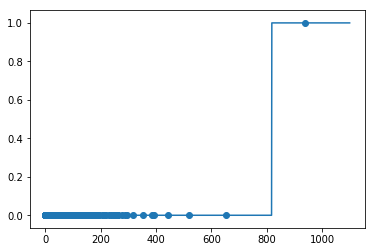

In [154]:
# Visualising the Training set results
plt.scatter(sc.inverse_transform(X_test),y_test)
plt.plot(np.arange(1100),classifier.predict(sc.transform(np.arange(1100).reshape(-1,1))))
plt.show()

In [155]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[215   0]
 [  0   1]]
